In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the star dataset
df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')


**Lets first make a 3D Scatter Plot of the original data**

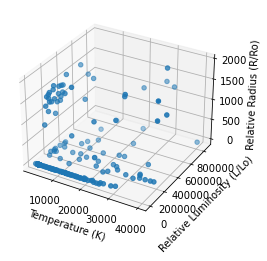

In [2]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the temperature, relative luminosity, and relative radius of the stars
ax.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], df['Radius(R/Ro)'])

# Label the axes
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Relative Luminosity (L/Lo)')
ax.set_zlabel('Relative Radius (R/Ro)')

# Show the plot
plt.show()

**We are trying to find binary star systems in the data, so let's run a basic clustering algorithm, K-Means, to figure out the star systems**

In [3]:
from sklearn.cluster import KMeans

# Extract the temperature, relative luminosity, and relative radius features
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']]

# Train the KMeans algorithm
kmeans = KMeans(n_clusters=2).fit(X)

# Predict the cluster labels for each star
labels = kmeans.predict(X)

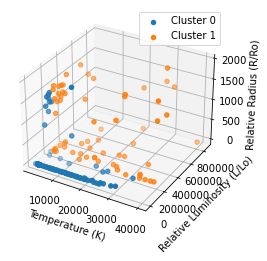

In [4]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the stars in binary star systems in different colors using K-Means Algorithm
for label in np.unique(labels):
    ax.scatter(df[labels == label]['Temperature (K)'], df[labels == label]['Luminosity(L/Lo)'], df[labels == label]['Radius(R/Ro)'], label=f'Cluster {label}')

# Label the axes
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Relative Luminosity (L/Lo)')
ax.set_zlabel('Relative Radius (R/Ro)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

**Great! We can see the distinct regions of the two star systems. But K-Means is a very basic algorithm that doesn't make the best of fit of all of the data, so lets run a better algorithm: Agglomorative Clustering**

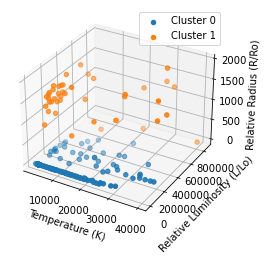

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the star dataset
df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

# Standardize the features
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(X_scaled)
labels = agg_cluster.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the stars in binary star systems in different colors using Hierarchial Agglomerative Clustering
for label in np.unique(labels):
    ax.scatter(df[labels == label]['Temperature (K)'], df[labels == label]['Luminosity(L/Lo)'], df[labels == label]['Radius(R/Ro)'], label=f'Cluster {label}')

# Label the axes
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Relative Luminosity (L/Lo)')
ax.set_zlabel('Relative Radius (R/Ro)')

# Show the legend
plt.legend()

# Show the plot
plt.show()


**Much Better! We can see the clear difference in accuracy between K-Means and Agglomerative Clustering**